In [18]:
#API Calls - Houston

import requests
import pandas as pd

# %pip install openpyxl

# Load the FIPS codes into a set for efficiency
fips_codes_df = pd.read_excel('./data_files/Houston_Tract_ID.xlsx', header=None, engine='openpyxl')
fips_codes = set(fips_codes_df[0])  # Assuming the FIPS codes are in the first column

# DataFrame to store all results
houston_data = pd.DataFrame()
# print(fips_codes)
# Initialize counters for tracking API calls
success_count = 0
fail_count = 0


# Loop through the FIPS codes, limited by max_calls
for i, fips_code in enumerate(fips_codes):
    if i >= 400:
        break  # Exit the loop after reaching max_calls

    # Construct the API URL for Houston data
    url = f"https://ejscreen.epa.gov/mapper/ejscreenRESTbroker1.aspx?namestr={fips_code}&geometry=&distance=&unit=9035&areatype=tract&areaid={fips_code}&f=json"
    response = requests.get(url)
    
    data = response.json()
    if 'data' in data:
        df = pd.json_normalize(data['data'])
        houston_data = pd.concat([houston_data, df], ignore_index=True)
        success_count += 1
    else:
        fail_count += 1

# Display the counts and the first few rows of the combined data
print(f"Success: {success_count}, Failures: {fail_count}")

{48201420800, 48201220100, 48201322500, 48201531400, 48201330700, 48201433100, 48201232400, 48201240600, 48201343000, 48201551900, 48201453600, 48201252900, 48201410600, 48201312300, 48201521200, 48201320500, 48201422900, 48201222200, 48201431100, 48201533500, 48201230400, 48201332800, 48201541700, 48201341000, 48201451600, 48201554000, 48201250900, 48201511000, 48201310300, 48201412700, 48201212000, 48201420900, 48201220200, 48201322600, 48201531500, 48201330800, 48201433200, 48201232500, 48201240700, 48201343100, 48201552000, 48201453700, 48201253000, 48201410700, 48201312400, 48201521300, 48201320600, 48201423000, 48201222300, 48201431200, 48201533600, 48201230500, 48201332900, 48201541800, 48201341100, 48201451700, 48201554100, 48201251000, 48201511100, 48201310400, 48201412800, 48201212100, 48201421000, 48201220300, 48201322700, 48201531600, 48201330900, 48201433300, 48201232600, 48201240800, 48201343200, 48201552100, 48201453800, 48201253100, 48201211900, 48201410800, 48201210100

In [19]:
#Exploring Data

houston_data.describe()
houston_data.shape


(196, 317)

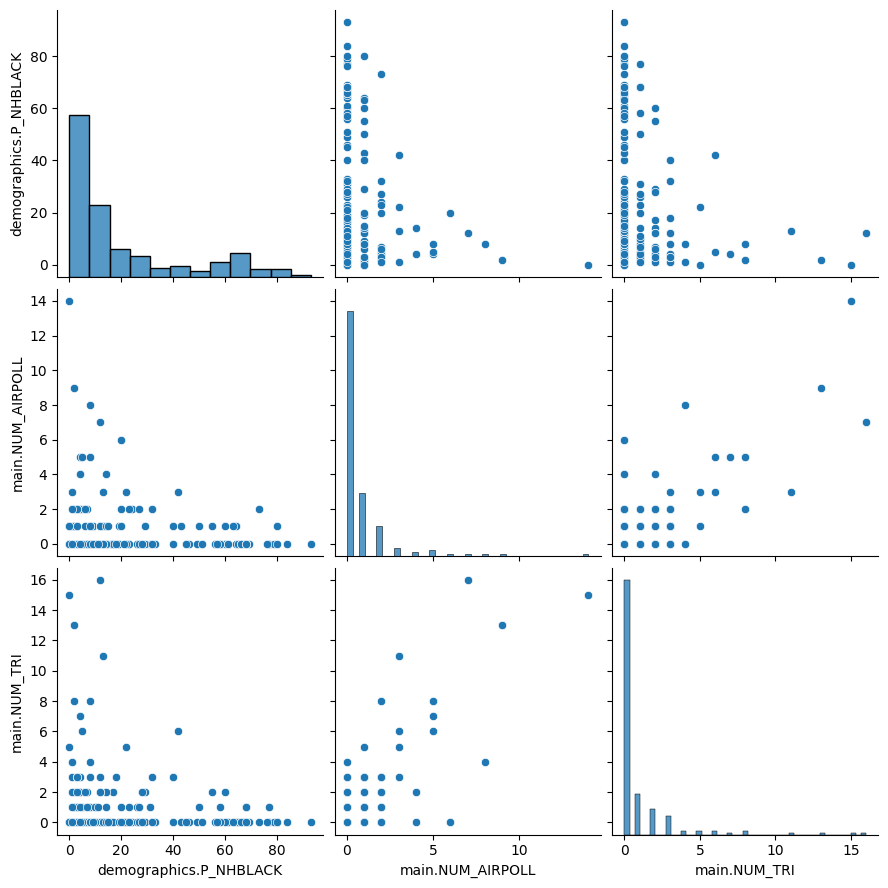

In [20]:
#Visualizing Data

#If you don't already have seaborn
# %pip install --upgrade seaborn
# %pip install --upgrade numpy

import seaborn as sns 
import pandas as pd

#Setting the theme
# sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

#Convert to numeric
houston_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]] = houston_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]].apply(pd.to_numeric)


sns.pairplot(houston_data, vars =["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"],height=3)
# sns.scatterplot(x="demographics.P_NHBLACK", y="extras.RAW_CI_FLOOD", data= houston_data)


#Outliers problematic

In [21]:
#Pandas DF to SQL DB

#inspired by https://stackoverflow.com/questions/30631325/writing-to-mysql-database-with-pandas-using-sqlalchemy-to-sql
# %pip install sqlalchemy

import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data_files/houston_epa.db')

houston_data.to_sql('houston_epa', engine, index=False, if_exists='replace')

196

In [22]:
#Check SQL Database

from sqlalchemy import create_engine, text

# Create an engine that connects to the SQLite database file in your data_files directory
engine = create_engine('sqlite:///data_files/houston_epa.db')

# Connect to the database
with engine.connect() as connection:
    # Execute a simple SQL query to count the rows in the houston_epa table
    row_count = connection.execute(text("SELECT COUNT(*) FROM houston_epa")).fetchone()[0]

print(f"The number of rows in the 'houston_epa' table is: {row_count}")

The number of rows in the 'houston_epa' table is: 196
